## Practical 5B

## Scaling method from sklearn on Boston Housing data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
from keras.datasets import boston_housing
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

print(X_train[0], y_train[0])

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ] 15.2


In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [4]:
# Fitting the scaler on the training dataset
scaler.fit(X_train)

StandardScaler()

In [5]:
# Then we call the transform method to scale both the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# A sample output
print(X_train_scaled[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]


In [9]:
# Model building
from keras import models, layers
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=[X_train.shape[1]]))
model.add(layers.Dense(16, activation='relu'))

# Output layer
model.add(layers.Dense(1))

In [10]:
# Compile model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [11]:
# Training model
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100)

Epoch 1/100
11/11 [==============================] - 3s 93ms/step - loss: 519.6338 - mae: 21.0150 - val_loss: 620.7109 - val_mae: 23.1637
Epoch 2/100
11/11 [==============================] - 0s 14ms/step - loss: 536.4292 - mae: 21.2213 - val_loss: 607.1515 - val_mae: 22.8766
Epoch 3/100
11/11 [==============================] - 0s 11ms/step - loss: 553.1606 - mae: 21.6162 - val_loss: 593.2578 - val_mae: 22.5813
Epoch 4/100
11/11 [==============================] - 0s 12ms/step - loss: 569.0900 - mae: 21.7658 - val_loss: 578.5596 - val_mae: 22.2679
Epoch 5/100
11/11 [==============================] - 0s 12ms/step - loss: 492.8267 - mae: 20.3216 - val_loss: 561.7648 - val_mae: 21.9064
Epoch 6/100
11/11 [==============================] - 0s 10ms/step - loss: 514.8959 - mae: 20.7075 - val_loss: 544.8542 - val_mae: 21.5324
Epoch 7/100
11/11 [==============================] - 0s 9ms/step - loss: 498.0854 - mae: 20.2565 - val_loss: 525.9720 - val_mae: 21.1140
Epoch 8/100
11/11 [================

11/11 [==============================] - 0s 17ms/step - loss: 26.8911 - mae: 3.2180 - val_loss: 25.6223 - val_mae: 3.7112
Epoch 62/100
11/11 [==============================] - 0s 18ms/step - loss: 21.6315 - mae: 3.1441 - val_loss: 25.1992 - val_mae: 3.6691
Epoch 63/100
11/11 [==============================] - 0s 19ms/step - loss: 21.7540 - mae: 3.1280 - val_loss: 25.0223 - val_mae: 3.6708
Epoch 64/100
11/11 [==============================] - 0s 18ms/step - loss: 23.4454 - mae: 3.1655 - val_loss: 24.8495 - val_mae: 3.6653
Epoch 65/100
11/11 [==============================] - 0s 18ms/step - loss: 19.5429 - mae: 2.9431 - val_loss: 24.6186 - val_mae: 3.6454
Epoch 66/100
11/11 [==============================] - 0s 21ms/step - loss: 21.5891 - mae: 3.2036 - val_loss: 24.1357 - val_mae: 3.6325
Epoch 67/100
11/11 [==============================] - 0s 18ms/step - loss: 23.0189 - mae: 3.1498 - val_loss: 23.7066 - val_mae: 3.5762
Epoch 68/100
11/11 [==============================] - 0s 12ms/step -

In [12]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

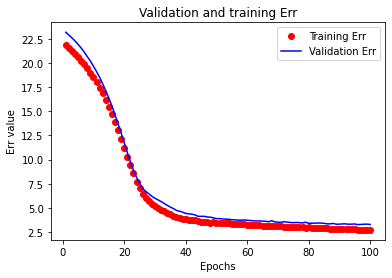

In [14]:
# Plotting losses
mae = history_dict['mae']
val_mae = history_dict['val_mae']

epochs = range(1, len(mae)+1)

plt.plot(epochs, mae, 'ro', label='Training Err')
plt.plot(epochs, val_mae, 'b-', label='Validation Err')

plt.title('Validation and training Err')
plt.xlabel('Epochs')
plt.ylabel('Err value')
plt.legend()
plt.show()

In [15]:
# Evaluation on test data
model.evaluate(X_test_scaled, y_test) # output = [mean squared error, mean absolute error]

4/4 [==============================] - 0s 3ms/step - loss: 25.2854 - mae: 3.6760


[25.28544044494629, 3.6759588718414307]

K fold validation method gives us 2.5 mean absolute error, better than this one (3.67), but in a housing problem statement, such a 3.67 is also not a bad error. 

In [16]:
# Model prediction
# Predicted data
to_predict = X_train_scaled[:2]
predictions = model.predict(to_predict)
print(predictions)

# Real values
print(y_train[:2])

[[16.3893 ]
 [41.03262]]
[15.2 42.3]
